# <center>Объявления о продаже автомобилей в Германии<center>

Вам представлен датасет с объявлениями о продаже в Германии на 2022 год. Необходимо осмотреть первично данные и выполнить их предобработку, также сделать соответствующие выводы по полученной информации

### Обзор данных

* `mileage` — Пройденное расстояние на автомобиле
* `make` — Марка автомобиля
* `model` — Модель автомобиля
* `fuel` — Тип топлива
* `gear` — Тип коробки передач
* `offerType` — Тип предложения, то есть «Новые», «Демонстрационные» машины и т.д.
* `price` — Цена продажи автомобиля в объявлении (в долларах)
* `hp` — Количество лошадиных сил
* `year` — Год производства автомобиля

Импортируйте необходимые библиотеки

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np 

### Загрузка данных

1. Загрузите необходимый датасет в переменную

In [2]:
data = pd.read_csv('germany_cars.csv', sep = ',')
copy = data.copy(deep = True)

2. Проведите первичный осмотр данных при помощи известных вам методов(дополнительно можно использовать метод hist() для оценки распределений). Сделайте соответствующие выводы на основе полученной информации

In [225]:
copy.shape

(46405, 9)

<Axes: >

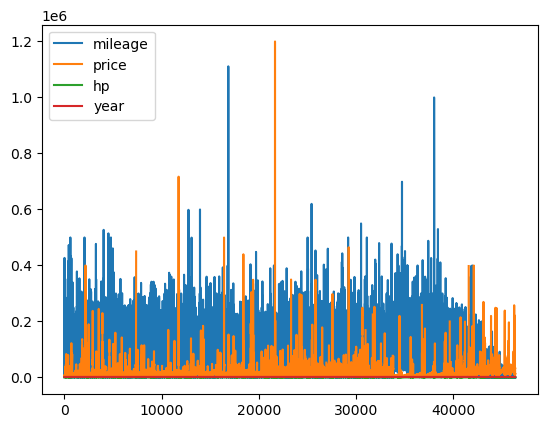

In [3]:
copy.plot()

In [226]:
display(copy)

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800.0,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877.0,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900.0,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950.0,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950.0,156.0,2011
...,...,...,...,...,...,...,...,...,...
46400,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990.0,71.0,2021
46401,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990.0,71.0,2021
46402,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990.0,71.0,2021
46403,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990.0,71.0,2021


In [227]:
copy.sample(10)

,mileage,make,model,fuel,gear,offerType,price,hp,year
8999,7600,Opel,Combo,Gasoline,Manual,Used,19950.0,110.0,2018
14424,76000,Mercedes-Benz,B 180,Gasoline,Automatic,Used,15900.0,122.0,2014
34909,270000,Volkswagen,Golf Variant,Diesel,Manual,Used,5300.0,105.0,2011
1707,60293,Peugeot,2008,Gasoline,Manual,Used,9900.0,120.0,2014
37317,107000,MINI,One D,Diesel,Manual,Used,7750.0,90.0,2013
12681,72110,Renault,Laguna,Diesel,Automatic,Used,14850.0,235.0,2011
23628,22106,Renault,Trafic,Diesel,Manual,Used,21990.0,120.0,2019
43244,9500,BMW,M2,Gasoline,Automatic,Used,50900.0,411.0,2019
35528,75306,Hyundai,i30,Gasoline,Manual,Used,6990.0,109.0,2012
8179,13460,Opel,Corsa,Gasoline,Manual,Used,12597.0,90.0,2019


In [228]:
copy.describe(include = "all")

,mileage,make,model,fuel,gear,offerType,price,hp,year
count,4.640500e+04,46405,46262,46158,46223,46405,4.487200e+04,46376.000000,46405.000000
unique,NaN,77,841,11,3,5,NaN,NaN,NaN
top,NaN,Volkswagen,Golf,Gasoline,Manual,Used,NaN,NaN,NaN
freq,NaN,6931,1492,28702,30380,40122,NaN,NaN,NaN
mean,7.117786e+04,NaN,NaN,NaN,NaN,NaN,1.656545e+04,132.990987,2016.012951
std,6.262531e+04,NaN,NaN,NaN,NaN,NaN,1.936315e+04,75.449284,3.155214
min,0.000000e+00,NaN,NaN,NaN,NaN,NaN,1.100000e+03,1.000000,2011.000000
25%,1.980000e+04,NaN,NaN,NaN,NaN,NaN,7.490000e+03,86.000000,2013.000000
50%,6.000000e+04,NaN,NaN,NaN,NaN,NaN,1.099900e+04,116.000000,2016.000000
75%,1.050000e+05,NaN,NaN,NaN,NaN,NaN,1.949000e+04,150.000000,2019.000000


In [229]:
copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46405 entries, 0 to 46404
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mileage    46405 non-null  int64  
 1   make       46405 non-null  object 
 2   model      46262 non-null  object 
 3   fuel       46158 non-null  object 
 4   gear       46223 non-null  object 
 5   offerType  46405 non-null  object 
 6   price      44872 non-null  float64
 7   hp         46376 non-null  float64
 8   year       46405 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 3.2+ MB


array([[<Axes: title={'center': 'mileage'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'hp'}>, <Axes: title={'center': 'year'}>]],
      dtype=object)

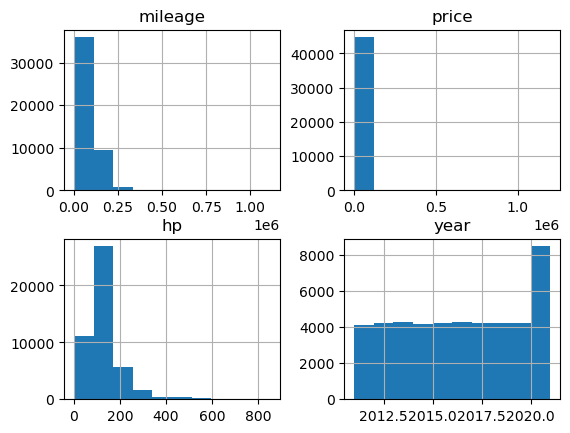

In [9]:
copy.hist()

<div class="alert alert-info">
    <b>ВЫВОДЫ:</b>
- Набор данных включает 46405 строк по 9 столбцов
- Набор данных содежит дубликаты строк (вывод display(copy`)
- Набор скорее всего содержит ошибочные значения: 1 лошадиная сила, 11 видов топлива (вывод copy.describe())
- Набор данных имеет пропуски значений в столбцах <b>model, fuel, gear, price,	hp</b> (вывод copy.info())
</div>
<div class="alert alert-info">
    <b>Так же можно отметить, что</b>
    
- Наиболее продаваемый автомобиль - Volkswagen	Golf
- Наиболее используемое топливо - бензин
- Наиболее используема коробка передачь - ручная
- Года выпуска автовобилей с 2011 по 2021


</div>

3. Переименуйте столбец `offerType` под стандартное название

In [230]:
copy.rename(columns = {'offerType' : 'offer_type'}, inplace = True)
copy.head(1)

,mileage,make,model,fuel,gear,offer_type,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800.0,116.0,2011


### Работа с дубликатами данных

4. Необходимо вывести на экран количество дублированных строк в данных, если таковые имеются, а также избавиться от них. Не забудьте сбросить индекс в датафрейме при необходимости.

In [231]:
print(f'В датасете {len(copy) - len(copy.drop_duplicates())} дубликатов строк')
copy.drop_duplicates(inplace = True)
copy.reset_index(drop = True, inplace = True)
copy.tail()

В датасете 2003 дубликатов строк


,mileage,make,model,fuel,gear,offer_type,price,hp,year
44397,10,Citroen,C1,Gasoline,Manual,Pre-registered,12340.0,72.0,2021
44398,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12490.0,71.0,2021
44399,550,Fiat,500,Electric/Gasoline,Manual,Demonstration,12805.0,69.0,2021
44400,837,Fiat,Panda,Electric/Gasoline,Manual,Demonstration,12805.0,69.0,2021
44401,1500,Skoda,Fabia,Gasoline,Manual,Demonstration,12980.0,60.0,2021


### Работа с пропусками

5. Выведите на экран количество пропусков в каждом столбце, опишите их, почему они могут возникнуть и как их возможно исправить

In [232]:
copy.isnull().sum()

mileage          0
make             0
model          137
fuel           247
gear           175
offer_type       0
price         1520
hp              24
year             0
dtype: int64

<div class="alert alert-info">
    
 Пропуски могут возникать в следствии отсутсвия необходимых данных, ошибок при вводе данных.Пропуски можно либо заполнить какими-то значениями, либо удалить</div>

6. Заполните пропуски в `model`,`fuel`,`gear`

In [233]:
copy.model.fillna('Unknown', inplace = True)
copy.fuel.fillna('Unknown', inplace = True)
copy.gear.fillna('Unknown', inplace = True)

## Работа с пропусками данных ПРО (желательно выполнить, но необязательно)

7. Необходимо заполнить пропуски в столбце `price` с помощью медианного значения по моделям автомобиля.

In [234]:
#Создаю датасет с названием модели и меианной ценой
model_median = copy.groupby(by = 'model', as_index = False)[['price']].agg("median").round(0)

for i in model_median.model:   
    n = model_median.index[model_median['model'] == i].tolist()[0]
    price_median = model_median.price[n]
    copy.loc[(copy.model == i) & (pd.isna(copy['price']) == True), 'price'] = price_median
   


In [235]:
copy.isnull().sum()
#Почему-то остаются два NaN

mileage        0
make           0
model          0
fuel           0
gear           0
offer_type     0
price          2
hp            24
year           0
dtype: int64

## Продолжение базовых заданий

7. Если предыдущее задание показалось Вам сложным, то удалите оставшиеся пропуски.

In [236]:
copy.dropna(inplace = True)


Проверьте, все ли пропуски точно удалились из датафрейма

In [237]:
copy.isnull().sum()

mileage       0
make          0
model         0
fuel          0
gear          0
offer_type    0
price         0
hp            0
year          0
dtype: int64

8. Оцените количество уникальных марок автомобилей (производителей) с помощью метода unique() и выведите их количество числом (пожалуйста, не считайте вручную)

In [238]:
u = copy.make.unique()
print(u)
len(u)

['BMW' 'Volkswagen' 'SEAT' 'Renault' 'Peugeot' 'Toyota' 'Opel' 'Mazda'
 'Ford' 'Mercedes-Benz' 'Chevrolet' 'Audi' 'Fiat' 'Kia' 'Dacia' 'MINI'
 'Hyundai' 'Skoda' 'Citroen' 'Infiniti' 'Suzuki' 'SsangYong' 'smart'
 'Cupra' 'Volvo' 'Jaguar' 'Porsche' 'Nissan' 'Honda' 'Lada' 'Mitsubishi'
 'Others' 'Lexus' 'Jeep' 'Maserati' 'Bentley' 'Land' 'Alfa' 'Subaru'
 'Dodge' 'Microcar' 'Lamborghini' 'Baic' 'Tesla' 'Chrysler' '9ff'
 'McLaren' 'Aston' 'Rolls-Royce' 'Alpine' 'Lancia' 'Abarth' 'DS'
 'Daihatsu' 'Ligier' 'Ferrari' 'Caravans-Wohnm' 'Aixam' 'Piaggio' 'Zhidou'
 'Morgan' 'Maybach' 'Tazzari' 'Trucks-Lkw' 'RAM' 'Iveco' 'DAF' 'Alpina'
 'Polestar' 'Brilliance' 'FISKER' 'Cadillac' 'Trailer-Anhänger' 'Isuzu'
 'Corvette' 'DFSK' 'Estrima']


77

9. Выведите топ 20 марок автомобилей (производителей) по количеству объявлений с помощью метода value_counts()

In [239]:
copy.make.value_counts()[:20]

Volkswagen       6725
Opel             4613
Ford             4289
Skoda            2754
Renault          2703
Audi             2559
BMW              2372
Mercedes-Benz    2280
SEAT             1834
Hyundai          1757
Fiat             1500
Peugeot          1181
Toyota           1149
Kia               968
smart             936
Citroen           923
Volvo             778
Nissan            730
Mazda             699
Dacia             664
Name: make, dtype: int64

### Группировка данных

10. Сгруппируйте данные по столбцу `make`, выведите для каждого производителя среднюю стоимость их автомобиля, а также среднее число лошадиных сил и отсортируйте по убыванию столбца `price`. Отобразите только топ 20 самых дорогих производителей. Напишите вывод, всё ли в порядке с полученными данными или Вас что-то смущает

In [240]:
copy.groupby(by = 'make', as_index = False)[['price' , 'hp']].agg("mean").round(0).sort_values(by = 'price' , ascending = False)[:20]

,make,price,hp
46,Maybach,450479.0,543.0
27,Ferrari,324028.0,694.0
39,Lamborghini,305699.0,690.0
48,McLaren,207538.0,647.0
62,Rolls-Royce,194900.0,592.0
10,Bentley,182384.0,555.0
6,Aston,163443.0,536.0
17,Corvette,110160.0,687.0
59,Porsche,90140.0,412.0
26,FISKER,69900.0,408.0


<div class="alert alert-info">
Меня смущают некоторые названия производителей. <b>Например: Aston - должно быть Aston Martin, Land - Land Rover</b>. Так же смущает <b>Alpina и Alpine</b>. Скорее всего в датасете есть ошибки</div> 

11. Создайте новый столбец из `make` и `model` и выведите топ 10 самый дорогих и дешевых автомобилей с помощью средней стоимости

In [241]:
copy['make_model'] = copy['make'] + ' ' + copy['model']
copy.sample(10)


,mileage,make,model,fuel,gear,offer_type,price,hp,year,make_model
19471,194000,Dacia,Logan,Gasoline,Manual,Used,3500.0,84.0,2011,Dacia Logan
28493,60254,Nissan,Leaf,Electric,Automatic,Used,11500.0,109.0,2016,Nissan Leaf
31625,46500,Renault,Twingo,Gasoline,Manual,Used,4730.0,75.0,2012,Renault Twingo
33135,141160,Skoda,Fabia,Gasoline,Manual,Used,4480.0,105.0,2011,Skoda Fabia
15508,45500,Dacia,Duster,Gasoline,Manual,Used,8499.0,105.0,2014,Dacia Duster
14787,40490,Renault,Clio,Diesel,Manual,Used,10990.0,90.0,2018,Renault Clio
24450,117000,Opel,Adam,Gasoline,Manual,Used,6480.0,87.0,2014,Opel Adam
34132,116646,SEAT,Mii,Gasoline,Manual,Used,3290.0,60.0,2012,SEAT Mii
10635,10,Renault,Clio,Gasoline,Manual,Pre-registered,18490.0,91.0,2021,Renault Clio
3055,157000,Peugeot,508,Diesel,Manual,Used,6700.0,140.0,2012,Peugeot 508


In [218]:
print('Самые дорогие модели:')
copy.groupby(by = 'make_model', as_index = False)[['price']].agg("mean").round(0).sort_values(by = 'price', ascending = False)[:10]


Самые дорогие модели:


,make_model,price
234,Ferrari F12,1199900.0
569,Mercedes-Benz S 650,717078.0
445,Maybach Pullman,608439.0
233,Ferrari 812,439900.0
25,Aston Martin,398000.0
367,Lamborghini Aventador,371423.0
459,McLaren 675LT,297900.0
235,Ferrari F8 Tributo,294417.0
148,Bentley Flying Spur,251560.0
460,McLaren 720S,251145.0


In [242]:
print('Самые дешевые модели:')
copy.groupby(by = 'make_model', as_index = False)[['price']].agg("mean").round(0).sort_values(by = 'price', ascending = True)[:10]

Самые дешевые модели:


,make_model,price
363,Lada Priora,1190.0
151,Brilliance BS4,1500.0
647,Others Landwind,1850.0
861,Volvo Unknown,2499.0
796,Trailer-Anhänger Unknown,2750.0
302,Hyundai Getz,2800.0
807,Volkswagen Fox,3011.0
652,Peugeot 206,3366.0
250,Fiat Linea,3400.0
216,Daihatsu Cuore,3495.0


## Задания ПРО (желательно выполнить, но необязательно)

12. Выведите информацию о DataFrame с помощью метода describe() для категориальных данных , кратко опишите выведенную информацию

In [243]:
copy.describe(include = "object")

,make,model,fuel,gear,offer_type,make_model
count,44376,44376,44376,44376,44376,44376
unique,77,839,12,4,5,880
top,Volkswagen,Golf,Gasoline,Manual,Used,Volkswagen Golf
freq,6725,1458,27299,28909,38919,1458


<div class="alert alert-info">
Вывод показывает:
    - Количество элеменртов в столбцах
    - Количество уникальных элементов
    - Самые частовстречаемые элементы
    - Частоту часто частовстречаемых элементов
</div> 

13. Выведите на экран все BMW с пробегом меньше 1000 миль и годом производства после 2020 включительно, то есть, новые автомобили. Какие выводы можно сделать?

In [244]:
copy[(copy.model == 'BMW') & (copy.mileage < 1000) & (copy.year > 2020)] required_age	

,mileage,make,model,fuel,gear,offer_type,price,hp,year,make_model
5665,25,BMW,330,Electric/Gasoline,Automatic,Demonstration,54680.0,292.0,2021,BMW 330
5670,25,BMW,X5,Electric/Gasoline,Automatic,Demonstration,89980.0,394.0,2021,BMW X5
10239,41,BMW,118,Gasoline,Manual,Employee's car,24960.0,136.0,2021,BMW 118
15032,10,BMW,X2,Gasoline,Automatic,Pre-registered,41450.0,178.0,2021,BMW X2
27614,500,BMW,X5,Diesel,Automatic,Demonstration,81995.0,286.0,2021,BMW X5
29229,5,BMW,730,Diesel,Automatic,Demonstration,89995.0,286.0,2021,BMW 730
29235,600,BMW,X5 M,Gasoline,Automatic,Demonstration,71800.0,625.0,2021,BMW X5 M
31782,250,BMW,X1,Gasoline,Manual,Demonstration,29260.0,136.0,2021,BMW X1
44339,45,BMW,iX3,Electric,Unknown,Used,58000.0,286.0,2021,BMW iX3
44356,100,BMW,340,Gasoline,Automatic,Demonstration,82648.0,374.0,2021,BMW 340


<div class="alert alert-info">
Никто не хочет продавать BMW с малым пробегом</div> 

In [245]:
def category (col):
    if col < 3000:
        return "cheap"
    elif col > 10000:         
        return "expensive"
    else:
        return "average"
copy['category'] = copy['price'].apply(category) 
copy['price']
titanic_df['age'].apply(make_age)    

,mileage,make,model,fuel,gear,offer_type,price,hp,year,make_model,category
35672,351500,Toyota,Prius,Electric/Gasoline,Automatic,Used,8000.0,99.0,2014,Toyota Prius,average
34603,30214,Opel,Corsa,Gasoline,Manual,Used,5990.0,69.0,2013,Opel Corsa,average
39441,34400,Mercedes-Benz,GLE 400,Gasoline,Automatic,Used,49870.0,333.0,2017,Mercedes-Benz GLE 400,expensive
33760,49000,Volkswagen,Golf Plus,Gasoline,Automatic,Used,11890.0,122.0,2012,Volkswagen Golf Plus,expensive
28445,55000,Renault,Twingo,Gasoline,Manual,Used,5200.0,75.0,2014,Renault Twingo,average
17473,26900,Volkswagen,T-Cross,Gasoline,Manual,Used,18550.0,95.0,2020,Volkswagen T-Cross,expensive
4206,72996,Opel,Corsa,Diesel,Manual,Used,7790.0,95.0,2018,Opel Corsa,average
1533,136167,Mazda,CX-5,Diesel,Automatic,Used,17980.0,150.0,2017,Mazda CX-5,expensive
10733,58200,Renault,ZOE,Electric,Automatic,Used,7998.0,58.0,2015,Renault ZOE,average
2128,118782,Mercedes-Benz,S 350,Diesel,Automatic,Used,45980.0,258.0,2017,Mercedes-Benz S 350,expensive


In [246]:
copy.category.value_counts()

expensive    24222
average      19829
cheap          325
Name: category, dtype: int64

15. Сделайте общий вывод о проделанной работе

<div class="alert alert-info">
    <b>ВЫВОД по работе:</b>
    В ходе работа была проведена очистка данных от дубликатов и пропусков, сформирован новый столбец с корретным названием марки автомобиля, найден самый дорогой и самый дешевый автомобиль, а так же самый продаваемый производитель.
    Но в данных остался автомобиль с 1 лошадиной силой, видов топлива по прежднему 11 (12-й добавился UNKNOWN) из чего следует, что данные по-прежнему содержат ошибки.
</div>